<a href="https://colab.research.google.com/github/navneet-brar12/sentimentAnalysis/blob/main/SentimentAnalyser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.tree import DecisionTreeClassifier


In [2]:
#Load the data
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Reviews.csv')


In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
#Column names
print(f"Feature names: {df.columns.values}")

Feature names: ['Id' 'ProductId' 'UserId' 'ProfileName' 'HelpfulnessNumerator'
 'HelpfulnessDenominator' 'Score' 'Time' 'Summary' 'Text']


In [ ]:
#check for null values
df.isnull().sum()

,0
Id,0
ProductId,0
UserId,0
ProfileName,26
HelpfulnessNumerator,0
HelpfulnessDenominator,0
Score,0
Time,0
Summary,27
Text,0


In [3]:
#drop the null values
df.dropna(inplace=True)

In [4]:
#creating a new column length that will contain the length of the string in text column
df['length']=df['Text'].apply(len)

In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,length
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,263
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,190
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,509
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,219
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,140


In [5]:
#data types of the features
df.dtypes

,0
Id,int64
ProductId,object
UserId,object
ProfileName,object
HelpfulnessNumerator,int64
HelpfulnessDenominator,int64
Score,int64
Time,int64
Summary,object
Text,object


In [ ]:
len(df)

568401

In [ ]:
#distinct values of score and its count
print(f"Score value count: \n{df['Score'].value_counts()}")

Score value count: 
Score
5    363102
4     80654
1     52264
3     42638
2     29743
Name: count, dtype: int64


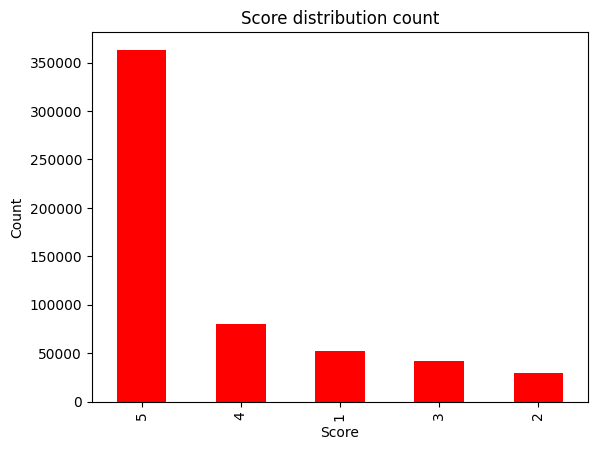

In [ ]:
#BAR PLoT to visualise the total counts of each score
df['Score'].value_counts().plot.bar(color='red')
plt.title('Score distribution count')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

In [ ]:
#Finding percentage distribution of each score
print(f"Score value count - percentage distribution: \n{round(df['Score'].value_counts()/len(df)*100,2)}")

Score value count - percentage distribution: 
Score
5    63.88
4    14.19
1     9.19
3     7.50
2     5.23
Name: count, dtype: float64


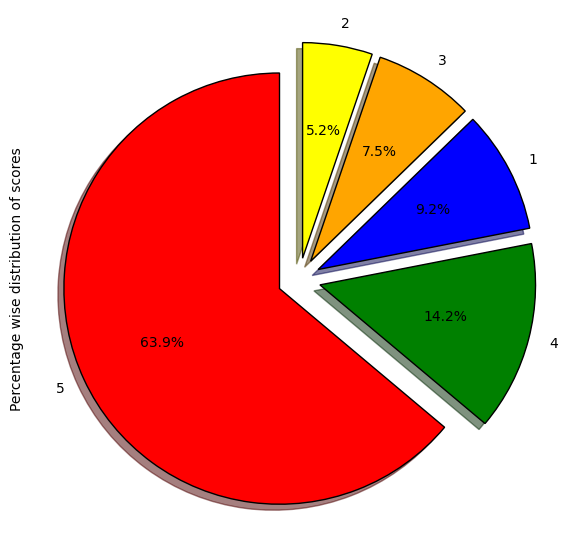

In [ ]:
# pie chart
fig=plt.figure(figsize=(7,7))
colors=('red','green','blue','orange','yellow')
wp={'linewidth':1,'edgecolor':'black'}
tags= df['Score'].value_counts()/df.shape[0]
explode=(0.1,0.1,0.1,0.1,0.1)
tags.plot(kind='pie',autopct='%1.1f%%',shadow=True,colors=colors,startangle=90,wedgeprops=wp,explode=explode,label='Percentage wise distribution of scores')
from io import BytesIO
graph=BytesIO()
plt.savefig(graph,format='png')
graph.seek(0)
plt.show()


Analysing the feedback column


In [3]:
example=df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [4]:
tokens=nltk.word_tokenize(example)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [5]:
tagged=nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [6]:
entities=nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


Feature Extraction

In [7]:
cv=CountVectorizer(stop_words='english')
X=cv.fit_transform(df['Text'])

VADER(Valence Aware Dictionary and Sentiment Reasoner) Sentiment Scoring
This uses a "bag of words" approach:
1. Stop words are removed
2. Each word is scored and combined to a total score

In [8]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
from tqdm.notebook import tqdm

sia= SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [9]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [21]:
#Applying vader to each data entry
res={}
for i,row in tqdm(df.iterrows(),total=len(df)):
  text=row['Text']
  myid=row['Id']
  res[myid]=sia.polarity_scores(text)

  0%|          | 0/7598 [00:00<?, ?it/s]

In [22]:
res

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [23]:
# Convert the dictionary to a DataFrame
results_df = pd.DataFrame(res).T  # Transpose the dictionary to make each row represent one 'Id'
results_df.reset_index(inplace=True)
results_df.columns = ['Id', 'neg', 'neu', 'pos', 'compound']  # Rename columns for clarity

In [24]:
# Merge the results with your original dataframe (df)
df = df.merge(results_df, on='Id')

Convert VADER's compound Score to Sentiment Labels


In [25]:
def get_sentiment(compound):
    if compound >= 0.05:
        return "Positive"
    elif compound <= -0.05:
        return "Negative"
    else:
        return "Neutral"

# Apply the function to create a new column 'predicted_sentiment'
df['predicted_sentiment'] = df['compound'].apply(get_sentiment)

In [26]:
#storing the result of above code
df['sentiment'] = df['Id'].map(res)  # if you want to map the sentiment results back to the DataFrame
df.to_csv('sentiment_results.csv', index=False)

In [27]:
#To load the dataframe in which we stored the result
df = pd.read_csv('sentiment_results.csv')

In [28]:
#converts the dictionary to a data frame and merges it with the original data frame
vaders=pd.DataFrame(res).T
vaders= vaders.reset_index().rename(columns={'index':'Id'})
vaders=vaders.merge(df,how='left')

In [27]:
vaders

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,length,predicted_sentiment,sentiment
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,263,Positive,"{'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'comp..."
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,190,Negative,"{'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'comp..."
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,509,Positive,"{'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'co..."
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,219,Neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,140,Positive,"{'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'comp..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568396,568450,0.072,0.600,0.327,0.8589,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,149,Positive,"{'neg': 0.072, 'neu': 0.6, 'pos': 0.327, 'comp..."
568397,568451,0.190,0.697,0.114,-0.4848,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,252,Negative,"{'neg': 0.19, 'neu': 0.697, 'pos': 0.114, 'com..."
568398,568452,0.037,0.884,0.078,0.4352,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",372,Positive,"{'neg': 0.037, 'neu': 0.884, 'pos': 0.078, 'co..."
568399,568453,0.041,0.506,0.452,0.9717,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,200,Positive,"{'neg': 0.041, 'neu': 0.506, 'pos': 0.452, 'co..."


In [28]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,length,predicted_sentiment,sentiment
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,263,Positive,"{'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'comp..."
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,190,Negative,"{'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'comp..."
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,509,Positive,"{'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'co..."
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,219,Neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,140,Positive,"{'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'comp..."


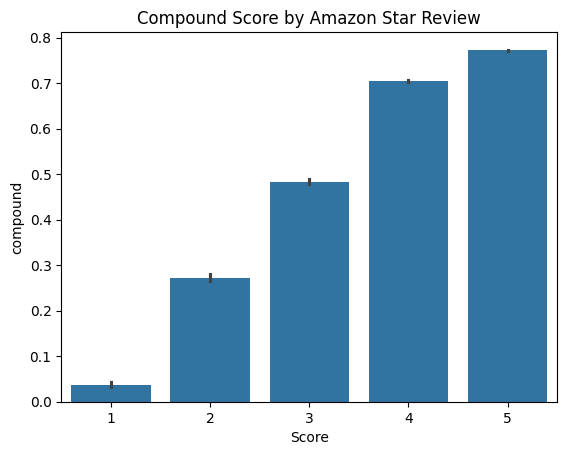

In [ ]:
#PLOT VADER RESULTS
ax=sns.barplot(data=vaders,x='Score',y='compound')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()

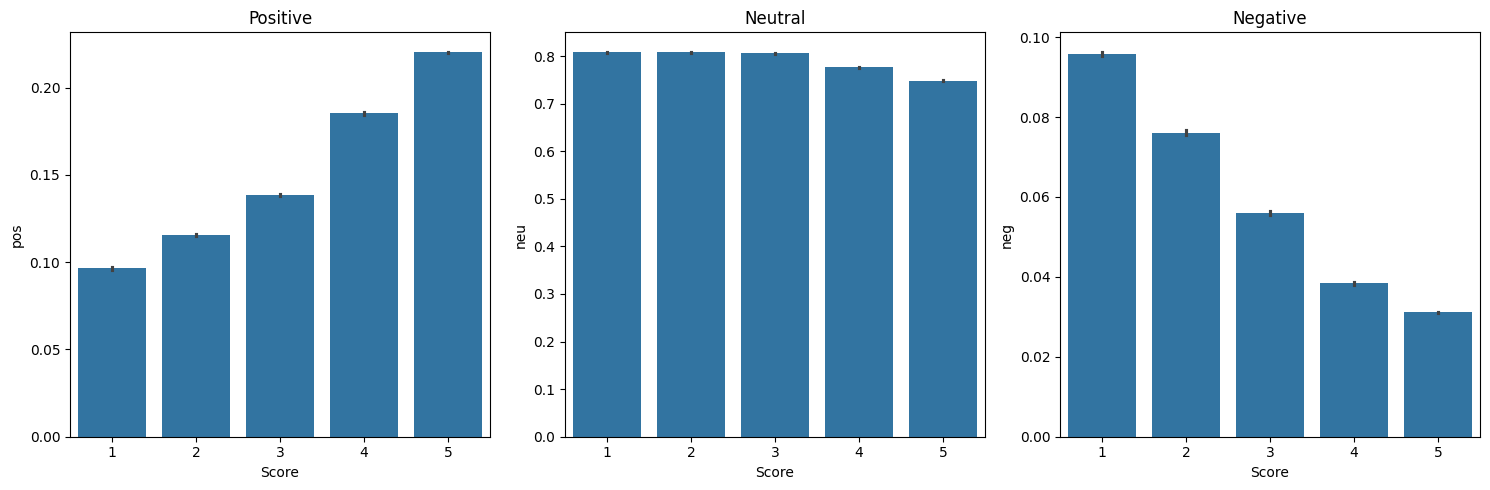

In [ ]:
fig,axs=plt.subplots(1,3,figsize=(15,5))
sns.barplot(data=vaders,x='Score',y='pos',ax=axs[0])
sns.barplot(data=vaders,x='Score',y='neu',ax=axs[1])
sns.barplot(data=vaders,x='Score',y='neg',ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()


In [29]:
#randomly sample a subset of data
sampled_df, _ = train_test_split(df, test_size=0.95, random_state=42)

Feature Engineering

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Apply TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf.fit_transform(df['Text']).toarray()

# The target variable (sentiment labels from your DataFrame)
y = df['predicted_sentiment'].map({'Positive': 1, 'Neutral': 0, 'Negative': -1})  # Encode labels


Train and test


In [31]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Model training and evaluation



Training Naive Bayes...
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       160
           0       0.00      0.00      0.00        32
           1       0.87      1.00      0.93      1328

    accuracy                           0.87      1520
   macro avg       0.29      0.33      0.31      1520
weighted avg       0.76      0.87      0.81      1520



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


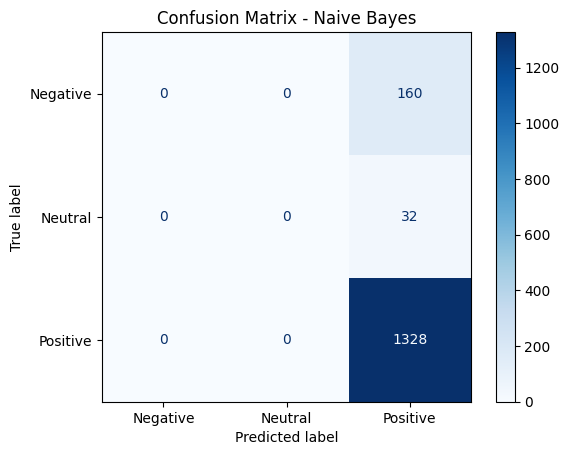


Training Random Forest...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report for Random Forest:
              precision    recall  f1-score   support

          -1       0.78      0.09      0.16       160
           0       0.00      0.00      0.00        32
           1       0.88      1.00      0.94      1328

    accuracy                           0.88      1520
   macro avg       0.55      0.36      0.36      1520
weighted avg       0.85      0.88      0.83      1520



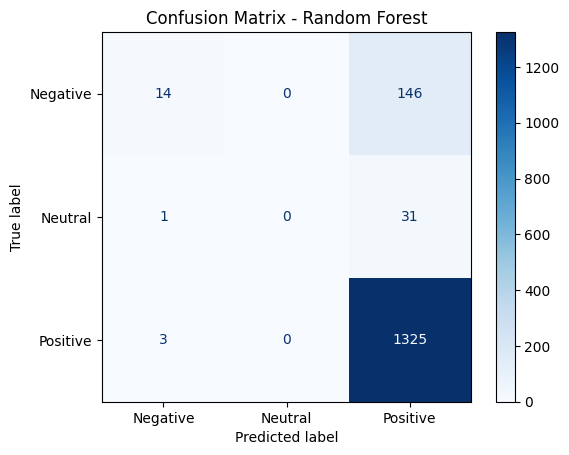


Training Decision Tree...
Classification Report for Decision Tree:
              precision    recall  f1-score   support

          -1       0.25      0.23      0.24       160
           0       0.07      0.06      0.07        32
           1       0.90      0.91      0.91      1328

    accuracy                           0.82      1520
   macro avg       0.41      0.40      0.40      1520
weighted avg       0.81      0.82      0.82      1520



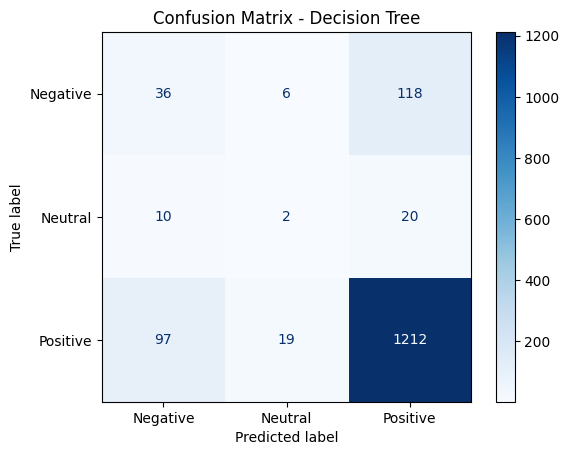

In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Initialize models
models = {
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Classification Report for {name}:\n{classification_report(y_test, y_pred)}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Neutral', 'Positive'])
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


Hyper Parameter tuning

In [33]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

# Best Parameters
print(f"Best parameters: {grid_search.best_params_}")
best_rf = grid_search.best_estimator_


Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  16.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  13.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  15.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  26.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  27.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  32.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  54.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 1.1min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  55.9s
[CV] END max_

Model Comparison

In [34]:
# Collecting results for comparison
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

# Adding Random Forest from Grid Search
y_pred_best_rf = best_rf.predict(X_test)
results["Tuned Random Forest"] = accuracy_score(y_test, y_pred_best_rf)

# Display results
print("Model Comparison:")
for model_name, acc in results.items():
    print(f"{model_name}: {acc * 100:.2f}%")


Model Comparison:
Naive Bayes: 87.37%
Random Forest: 88.09%
Decision Tree: 82.24%
Tuned Random Forest: 87.70%


Model comparison
Roc curve


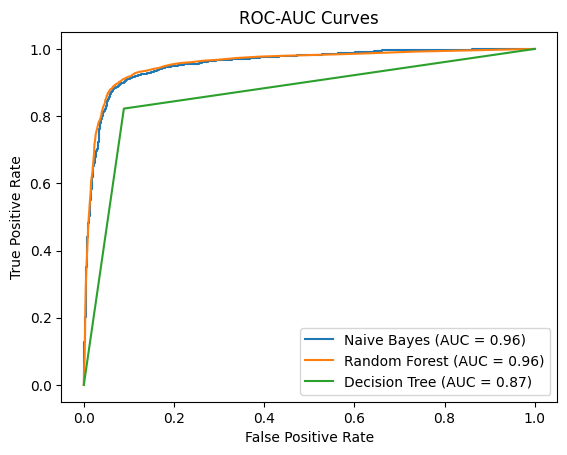

In [35]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output for ROC analysis
y_test_bin = label_binarize(y_test, classes=[-1, 0, 1])

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)
        fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.title("ROC-AUC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


The performance comparison of three models:

Naive Bayes (Blue Curve):
AUC (Area Under the Curve) = 0.96
Excellent performance.

Random Forest (Orange Curve):
AUC = 0.96
Similarly excellent.

Decision Tree (Green Curve):
AUC = 0.87
Performs worse than both Naive Bayes and Random Forest.

Error analysis

In [36]:
# Example for Random Forest
y_pred_rf = best_rf.predict(X_test)
df_errors = pd.DataFrame({
    'Text': tfidf.inverse_transform(X_test),
    'Actual': y_test,
    'Predicted': y_pred_rf
})
df_errors = df_errors[df_errors['Actual'] != df_errors['Predicted']]
print(f"Examples of Misclassified Samples:\n{df_errors.head()}")


Examples of Misclassified Samples:
                                                   Text  Actual  Predicted
4529  [alternative, cared, coffee, decaf, dinner, do...      -1          1
3674  [added, bitter, did, eater, extremely, mix, mo...      -1          1
6775  [100, 12, 140, 20, added, advertised, artifici...       0          1
6506  [bit, crumble, disappointed, does, easily, lik...      -1          1
7219  [comparable, crunchy, little, needed, nuts, pr...      -1          1
